In [2]:
# Import necessary libraries
import numpy as np  # For numerical operations
from keras.datasets import fashion_mnist  # For loading the Fashion MNIST dataset
from keras.layers import Input, Dense  # For building neural network layers
from keras.models import Model  # For creating a Keras model
import matplotlib.pyplot as plt  # For data visualization
from sklearn.manifold import TSNE  # For dimensionality reduction using t-SNE

# Load the Fashion MNIST dataset and split it into training and testing sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten images for unsupervised learning
train_images = train_images.reshape((len(train_images), -1))
test_images = test_images.reshape((len(test_images), -1))


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_images, train_images, epochs=50, batch_size=256, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/50
235/235 [==============================] - 9s 32ms/step - loss: 0.3764 - val_loss: 0.3167
Epoch 2/50
235/235 [==============================] - 6s 26ms/step - loss: 0.3090 - val_loss: 0.3063
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.3012 - val_loss: 0.3008
Epoch 4/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2969 - val_loss: 0.2969
Epoch 5/50
235/235 [==============================] - 5s 21ms/step - loss: 0.2936 - val_loss: 0.2943
Epoch 6/50
235/235 [==============================] - 4s 19ms/step - loss: 0.2912 - val_loss: 0.2921
Epoch 7/50
235/235 [==============================] - 8s 32ms/step - loss: 0.2893 - val_loss: 0.2907
Epoch 8/50
235/235 [==============================] - 7s 29ms/step - loss: 0.2879 - val_loss: 0.2904
Epoch 9/50
235/235 [==============================] - 8s 32ms/step - loss: 0.2867 - val_loss: 0.2885
Epoch 10/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2857 - val_lo

In [4]:
# Use the trained autoencoder to decode the test dataset
decoded_images = autoencoder.predict(test_images)

313/313 [==============================] - 1s 3ms/step


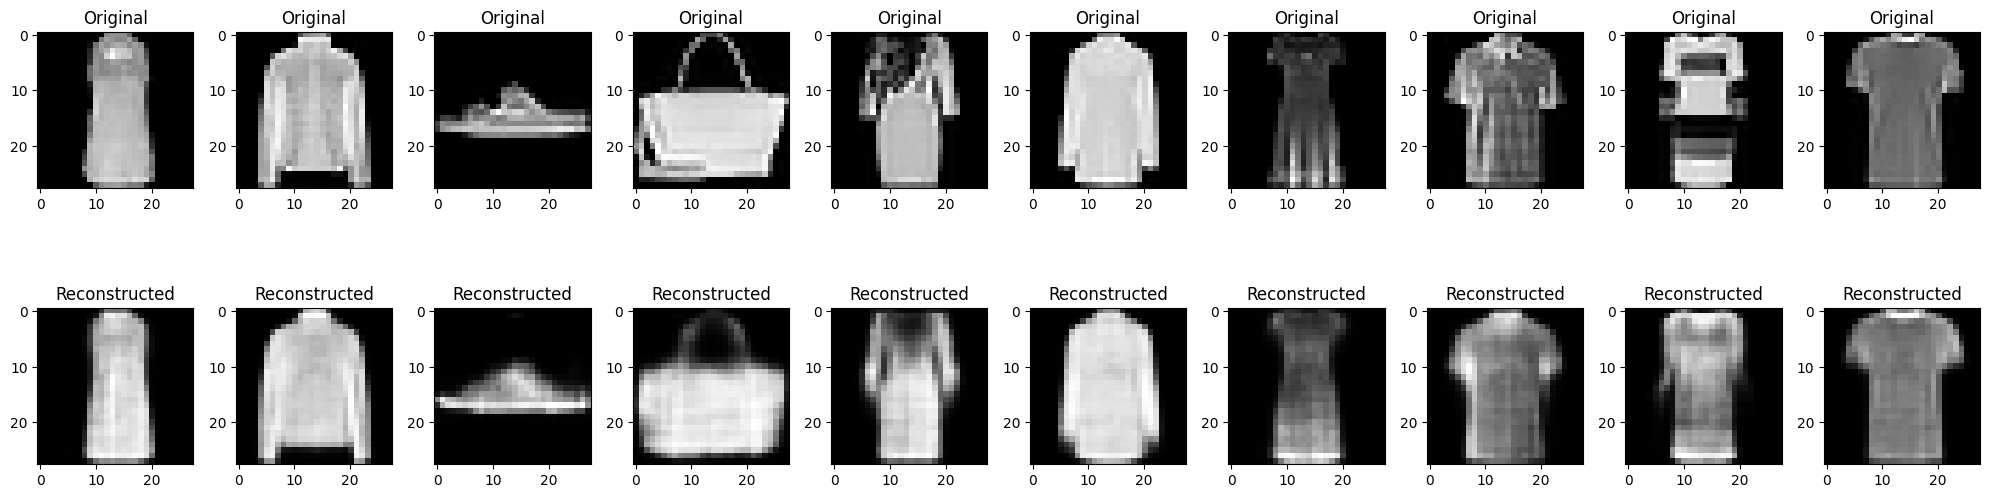

In [5]:
# Number of images to display
num_images = 10  # You can change this to the number of images you want to display

# Randomly select `num_images` indices from the test dataset
indices = np.random.randint(0, len(test_images), num_images)

# Select the corresponding test images and their encoded versions
selected_test_images = test_images[indices]
selected_decoded_images = decoded_images[indices]

# Plot the original and encoded images side by side
plt.figure(figsize=(20, 6))
for i in range(num_images):
    # Original test image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(selected_test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")

    # Reconstructed image
    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(selected_decoded_images[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")

plt.tight_layout()
plt.show()


In [6]:
# Encode the data
encoder = Model(input_img, encoded)
encoded_data = encoder.predict(test_images)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=45, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(encoded_data)


313/313 [==============================] - 1s 2ms/step


<ipython-input-7-7c18f4b960ad>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=test_labels, cmap=plt.cm.get_cmap("jet", 10), s=5)


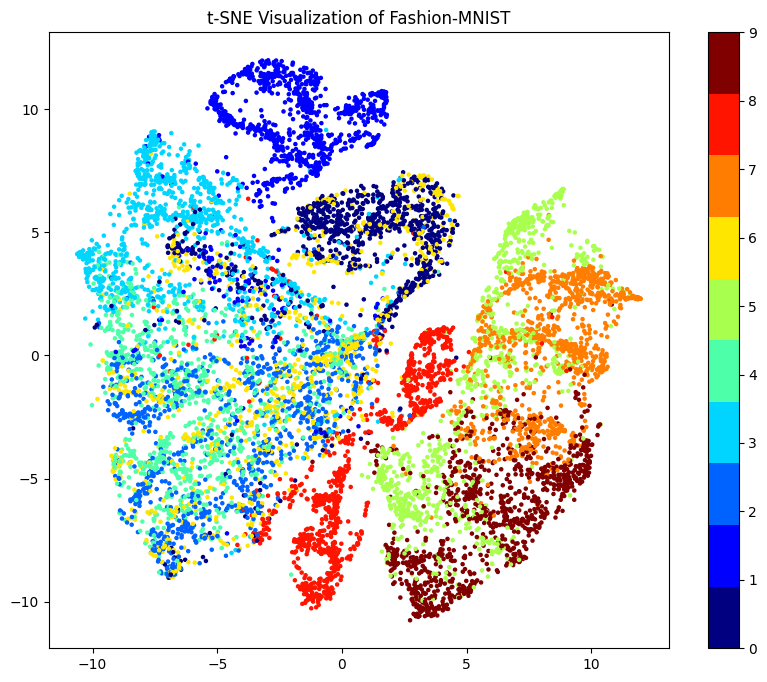

In [7]:
#plot of 2D cluster
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=test_labels, cmap=plt.cm.get_cmap("jet", 10), s=5)
plt.colorbar(ticks=range(10))
plt.title("t-SNE Visualization of Fashion-MNIST")
plt.show()
